In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
path="/content/drive/MyDrive/data"

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/SPX.csv')
oil = pd.read_csv('/content/drive/MyDrive/WTI_oil.csv')
oil=oil[::-1]
oil.Date = pd.to_datetime(oil.Date)
oil.set_index('Date', inplace = True)
x_oil=oil['Change']
x_oil = x_oil.drop(x_oil.head(1).index)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-08,2888.459961,2895.949951,2880.780029,2895.770020,2895.770020,3056460000
1,2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000
2,2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000
3,2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
4,2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
...,...,...,...,...,...,...,...
1253,2024-04-01,5257.970215,5263.950195,5229.200195,5243.770020,5243.770020,3325930000
1254,2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000
1255,2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000
1256,2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000


In [3]:
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace = True)

In [4]:
data['returns'] = data['Adj Close'] / data['Adj Close'].shift(1) - 1
data['returns'] = data['returns'].fillna(0)
data

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2019-04-08,2888.459961,2895.949951,2880.780029,2895.770020,2895.770020,3056460000,0.000000
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000,-0.006067
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000,0.003478
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000,0.000038
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000,0.006609
...,...,...,...,...,...,...,...
2024-04-01,5257.970215,5263.950195,5229.200195,5243.770020,5243.770020,3325930000,-0.002014
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000,-0.007239
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000,0.001091


In [5]:
data['returns(%)'] = data['returns']*100
data

,Open,High,Low,Close,Adj Close,Volume,returns,returns(%)
Date,,,,,,,,
2019-04-08,2888.459961,2895.949951,2880.780029,2895.770020,2895.770020,3056460000,0.000000,0.000000
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000,-0.006067,-0.606749
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000,0.003478,0.347787
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000,0.000038,0.003812
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000,0.006609,0.660932
...,...,...,...,...,...,...,...,...
2024-04-01,5257.970215,5263.950195,5229.200195,5243.770020,5243.770020,3325930000,-0.002014,-0.201358
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000,-0.007239,-0.723906
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000,0.001091,0.109112


In [6]:
data['log_returns'] = np.log(data['Adj Close']) - np.log(data['Adj Close'].shift(1))
data['log_returns'] = data['log_returns'].fillna(0)
data

,Open,High,Low,Close,Adj Close,Volume,returns,returns(%),log_returns
Date,,,,,,,,,
2019-04-08,2888.459961,2895.949951,2880.780029,2895.770020,2895.770020,3056460000,0.000000,0.000000,0.000000
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000,-0.006067,-0.606749,-0.006086
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000,0.003478,0.347787,0.003472
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000,0.000038,0.003812,0.000038
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000,0.006609,0.660932,0.006588
...,...,...,...,...,...,...,...,...,...
2024-04-01,5257.970215,5263.950195,5229.200195,5243.770020,5243.770020,3325930000,-0.002014,-0.201358,-0.002016
2024-04-02,5204.290039,5208.339844,5184.049805,5205.810059,5205.810059,3886590000,-0.007239,-0.723906,-0.007265
2024-04-03,5194.370117,5228.750000,5194.370117,5211.490234,5211.490234,3703250000,0.001091,0.109112,0.001091


In [7]:
x = data['returns(%)']
x = x.drop(x.head(1).index)
x

Date
2019-04-09   -0.606749
2019-04-10    0.347787
2019-04-11    0.003812
2019-04-12    0.660932
2019-04-15   -0.062937
                ...   
2024-04-01   -0.201358
2024-04-02   -0.723906
2024-04-03    0.109112
2024-04-04   -1.233434
2024-04-05    1.109919
Name: returns(%), Length: 1257, dtype: float64

Split the dataset into training set and test set

In [8]:
vol_forecasted = []
#h = 23 # forecast the last month
h = 126 # forecast the last 6 month
print('forecasting horizon: ', h)

forecasting horizon:  126


In [9]:
# train = data[0:1235], test = data[1235:], regard the last month as test set
x_train = x[ :len(x)-h]
x_train_oil = x_oil[ :len(x_oil)-h]
x_train


Date
2019-04-09   -0.606749
2019-04-10    0.347787
2019-04-11    0.003812
2019-04-12    0.660932
2019-04-15   -0.062937
                ...   
2023-09-28    0.589317
2023-09-29   -0.270958
2023-10-02    0.007937
2023-10-03   -1.374407
2023-10-04    0.810976
Name: returns(%), Length: 1131, dtype: float64

In [10]:
x[len(x)-h:]

Date
2023-10-05   -0.130403
2023-10-06    1.181489
2023-10-09    0.630385
2023-10-10    0.520799
2023-10-11    0.429301
                ...   
2024-04-01   -0.201358
2024-04-02   -0.723906
2024-04-03    0.109112
2024-04-04   -1.233434
2024-04-05    1.109919
Name: returns(%), Length: 126, dtype: float64

In [12]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 13.5 MB/s eta 0:00:00


Build the model

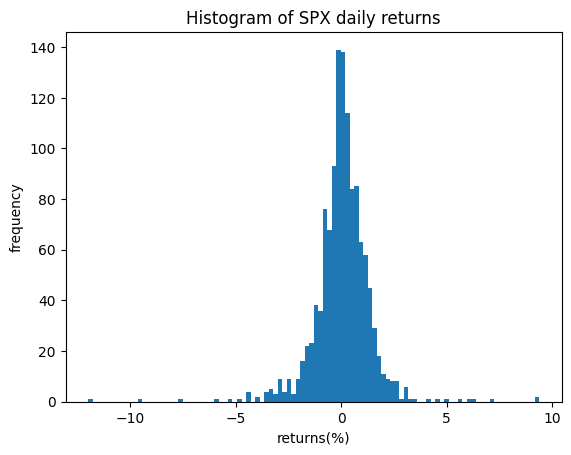

In [13]:
import matplotlib.pyplot as plt
plt.hist(x, bins = 100)
plt.xlabel('returns(%)')
plt.ylabel('frequency')
plt.title('Histogram of SPX daily returns')
plt.show()
from arch import arch_model

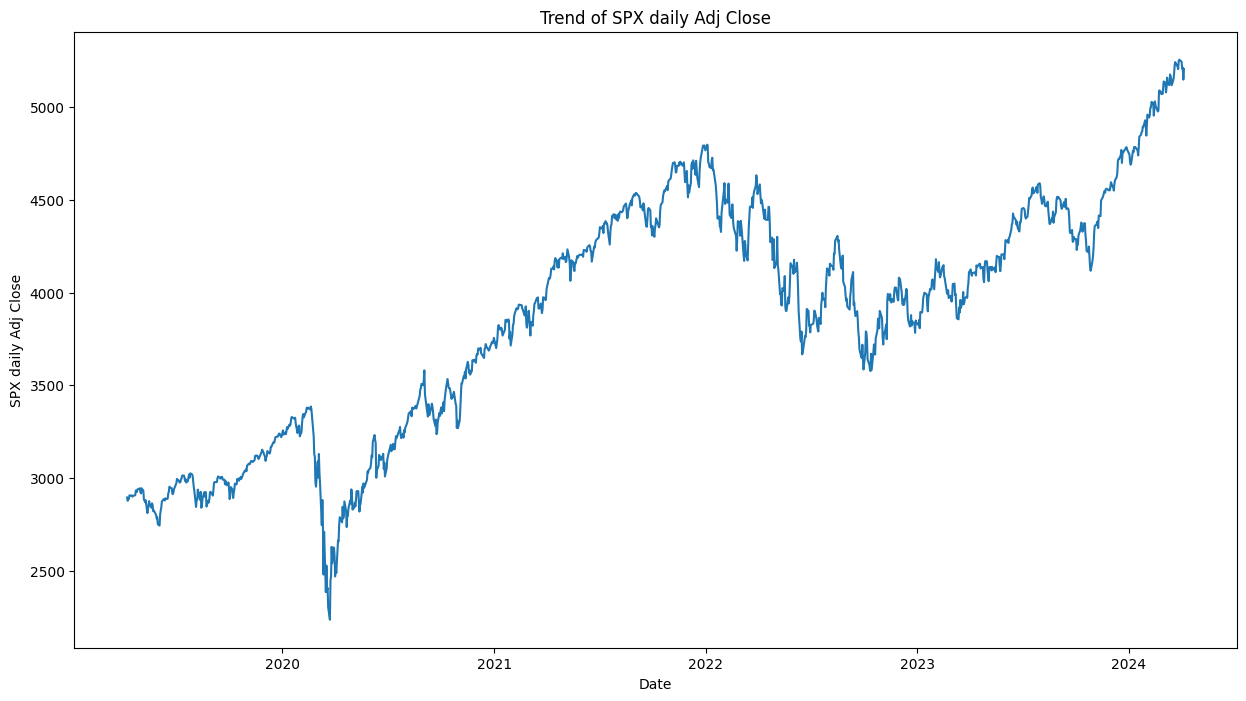

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('SPX daily Adj Close')
plt.title('Trend of SPX daily Adj Close')
plt.show()

In [15]:
vol = []
vol_std = []
for i in range(len(x)-21):
    x_test = x[i:i+21]
    vol_standard = np.std(x_test) * np.sqrt(252)
    gam = arch_model(y=x_test, x=x_oil[i:i+21], mean='ARX', lags=4, vol='GARCH', p=1, q=1,rescale=False,dist='Normal')
    res = gam.fit()
    forecast = res.forecast(horizon=1,x=x_oil[i+21:i+22])
    vol_forc = np.sqrt(forecast.variance.iloc[-1:])*np.sqrt(252)
    vol.append(vol_forc.iloc[0])
    vol_std.append(vol_standard)


流式输出内容被截断，只能显示最后 5000 行内容。
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     11,   Neg. LLF: 31714071.112116784
Iteration:      2,   Func. Count:     23,   Neg. LLF: 43376941.16318214
Iteration:      3,   Func. Count:     35,   Neg. LLF: 22.98892473555342
Iteration:      4,   Func. Count:     46,   Neg. LLF: 19.246806049288015
Iteration:      5,   Func. Count:     57,   Neg. LLF: 21.080580971749157
Iteration:      6,   Func. Count:     68,   Neg. LLF: 25.64156542644472
Iteration:      7,   Func. Count:     79,   Neg. LLF: 30.628542946648352
Iteration:      8,   Func. Count:     90,   Neg. LLF: 18.698978607561347
Iteration:      9,   Func. Count:    101,   Neg. LLF: 19.62940088981604
Iteration:     10,   Func. Count:    112,   Neg. LLF: 21.314298436046542
Iteration:     11,   Func. Count:    124,   Neg. LLF: 16.720722732411524
Iteration:     12,   Func. Count:    135,   Neg. LLF: 15.975824483734945
Iteration:     13,   Func. Count:    146,   Neg. LLF: 15.9117538

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     19,   Func. Count:    211,   Neg. LLF: 35.593637829451744
Iteration:     20,   Func. Count:    222,   Neg. LLF: 35.588715448203615
Iteration:     21,   Func. Count:    233,   Neg. LLF: 35.58781264041848
Iteration:     22,   Func. Count:    244,   Neg. LLF: 35.58748478167671
Iteration:     23,   Func. Count:    255,   Neg. LLF: 35.58746850051446
Optimization terminated successfully    (Exit mode 0)
            Current function value: 35.5874672858144
            Iterations: 23
            Function evaluations: 256
            Gradient evaluations: 23
Iteration:      1,   Func. Count:     11,   Neg. LLF: 518747929.6807884
Iteration:      2,   Func. Count:     23,   Neg. LLF: 108721985.0025637
Iteration:      3,   Func. Count:     35,   Neg. LLF: 114405962.44011685
Iteration:      4,   Func. Count:     47,   Neg. LLF: 55.744603934012694
Iteration:      5,   Func. Count:     59,   Neg. LLF: 37.42262100433759
Iteration:      6,   Func. Count:     70,   Neg. LLF: 36.0294570457

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      7,   Func. Count:     79,   Neg. LLF: 26.461350976108292
Iteration:      8,   Func. Count:     90,   Neg. LLF: 26.460180890670244
Iteration:      9,   Func. Count:    100,   Neg. LLF: 26.46091124132435
Iteration:     10,   Func. Count:    111,   Neg. LLF: 26.460109943310805
Iteration:     11,   Func. Count:    121,   Neg. LLF: 26.459754715629096
Iteration:     12,   Func. Count:    131,   Neg. LLF: 26.459463194842403
Iteration:     13,   Func. Count:    141,   Neg. LLF: 26.459348501575395
Iteration:     14,   Func. Count:    151,   Neg. LLF: 26.45930501008741
Iteration:     15,   Func. Count:    161,   Neg. LLF: 26.45930014923842
Iteration:     16,   Func. Count:    170,   Neg. LLF: 26.459300149227623
Optimization terminated successfully    (Exit mode 0)
            Current function value: 26.45930014923842
            Iterations: 16
            Function evaluations: 170
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     11,   Neg. LLF: 6515496.2

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


流式输出内容被截断，只能显示最后 5000 行内容。
Iteration:     11,   Func. Count:    124,   Neg. LLF: 16.353626273319183
Iteration:     12,   Func. Count:    135,   Neg. LLF: 15.91064758861827
Iteration:     13,   Func. Count:    145,   Neg. LLF: 15.910421804588914
Iteration:     14,   Func. Count:    155,   Neg. LLF: 15.910417606800252
Iteration:     15,   Func. Count:    164,   Neg. LLF: 15.910417606690343
Optimization terminated successfully    (Exit mode 0)
            Current function value: 15.910417606800252
            Iterations: 15
            Function evaluations: 164
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     11,   Neg. LLF: 37.40269815593035
Iteration:      2,   Func. Count:     24,   Neg. LLF: 29.85603160896505
Iteration:      3,   Func. Count:     37,   Neg. LLF: 15.336278245859887
Iteration:      4,   Func. Count:     48,   Neg. LLF: 15.1643667281953
Iteration:      5,   Func. Count:     58,   Neg. LLF: 15.199546729382497
Iteration:      6,   Func. Count:    

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     38,   Func. Count:    455,   Neg. LLF: -0.6311129259136363
Iteration:     39,   Func. Count:    465,   Neg. LLF: -1.0824555852010844
Iteration:     40,   Func. Count:    475,   Neg. LLF: -1.47639548496797
Iteration:     41,   Func. Count:    485,   Neg. LLF: -1.6040139293035844
Iteration:     42,   Func. Count:    495,   Neg. LLF: -3.243290185883427
Iteration:     43,   Func. Count:    505,   Neg. LLF: 175.44791930758245
Iteration:     44,   Func. Count:    518,   Neg. LLF: -4.351204998029608
Iteration:     45,   Func. Count:    528,   Neg. LLF: -5.339011458120575
Iteration:     46,   Func. Count:    538,   Neg. LLF: -5.401223727230932
Iteration:     47,   Func. Count:    548,   Neg. LLF: -5.436053234837016
Iteration:     48,   Func. Count:    558,   Neg. LLF: -5.4398143635782965
Iteration:     49,   Func. Count:    568,   Neg. LLF: -5.439965781003266
Iteration:     50,   Func. Count:    578,   Neg. LLF: -5.439996631219095
Iteration:     51,   Func. Count:    588,   Neg.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     11,   Neg. LLF: 36.49753074368918
Iteration:      2,   Func. Count:     23,   Neg. LLF: 24.36906028539535
Iteration:      3,   Func. Count:     34,   Neg. LLF: 24.777934063703714
Iteration:      4,   Func. Count:     45,   Neg. LLF: 24.387801579164677
Iteration:      5,   Func. Count:     56,   Neg. LLF: 25.48091384363304
Iteration:      6,   Func. Count:     67,   Neg. LLF: 24.72128186785219
Iteration:      7,   Func. Count:     78,   Neg. LLF: 24.189943849210845
Iteration:      8,   Func. Count:     88,   Neg. LLF: 24.77532390966455
Iteration:      9,   Func. Count:     99,   Neg. LLF: 24.56159513725557
Iteration:     10,   Func. Count:    110,   Neg. LLF: 24.07259764558494
Iteration:     11,   Func. Count:    120,   Neg. LLF: 24.05755253048999
Iteration:     12,   Func. Count:    130,   Neg. LLF: 24.06282261977748
Iteration:     13,   Func. Count:    141,   Neg. LLF: 24.04971326888419
Iteration:     14,   Func. Count:    152,   Neg. LLF: 24.0490

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     55,   Func. Count:    629,   Neg. LLF: 137.61640001113776
Iteration:     56,   Func. Count:    640,   Neg. LLF: 137.4805364777481
Iteration:     57,   Func. Count:    650,   Neg. LLF: 137.4700585294518
Iteration:     58,   Func. Count:    660,   Neg. LLF: 137.4642043978348
Iteration:     59,   Func. Count:    670,   Neg. LLF: 137.43750168009979
Iteration:     60,   Func. Count:    680,   Neg. LLF: 137.40257744979493
Iteration:     61,   Func. Count:    690,   Neg. LLF: 137.3602432057354
Iteration:     62,   Func. Count:    700,   Neg. LLF: 137.18349853199175
Iteration:     63,   Func. Count:    710,   Neg. LLF: 136.7883171774243
Iteration:     64,   Func. Count:    720,   Neg. LLF: 135.7485412581056
Iteration:     65,   Func. Count:    730,   Neg. LLF: 133.83643685032544
Iteration:     66,   Func. Count:    740,   Neg. LLF: 131.25006498065736
Iteration:     67,   Func. Count:    750,   Neg. LLF: 129.01785716209022
Iteration:     68,   Func. Count:    760,   Neg. LLF: 127

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     22,   Func. Count:    245,   Neg. LLF: 34.10326869925478
Iteration:     23,   Func. Count:    256,   Neg. LLF: 24.74256890037202
Iteration:     24,   Func. Count:    267,   Neg. LLF: 29.61109821461642
Iteration:     25,   Func. Count:    279,   Neg. LLF: 23.907423870911327
Iteration:     26,   Func. Count:    290,   Neg. LLF: 97.77584169931471
Iteration:     27,   Func. Count:    303,   Neg. LLF: 22.927189556106768
Iteration:     28,   Func. Count:    314,   Neg. LLF: 22.398619224534233
Iteration:     29,   Func. Count:    325,   Neg. LLF: 23.789666214417412
Iteration:     30,   Func. Count:    336,   Neg. LLF: 17.318668371295516
Iteration:     31,   Func. Count:    347,   Neg. LLF: 18.264705319035073
Iteration:     32,   Func. Count:    358,   Neg. LLF: 16.495910102779202
Iteration:     33,   Func. Count:    368,   Neg. LLF: 40.77501671510081
Iteration:     34,   Func. Count:    379,   Neg. LLF: 16.596843701916516
Iteration:     35,   Func. Count:    390,   Neg. LLF: 16

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      8,   Func. Count:     90,   Neg. LLF: 31.047475057050548
Iteration:      9,   Func. Count:    101,   Neg. LLF: 29.80565415656656
Iteration:     10,   Func. Count:    111,   Neg. LLF: 61.83596568334723
Iteration:     11,   Func. Count:    124,   Neg. LLF: 29.810534239075462
Iteration:     12,   Func. Count:    135,   Neg. LLF: 29.775827268115357
Iteration:     13,   Func. Count:    145,   Neg. LLF: 29.775235004236286
Iteration:     14,   Func. Count:    155,   Neg. LLF: 29.77522673219871
Iteration:     15,   Func. Count:    165,   Neg. LLF: 29.775224417630582
Iteration:     16,   Func. Count:    174,   Neg. LLF: 29.77522441778063
Optimization terminated successfully    (Exit mode 0)
            Current function value: 29.775224417630582
            Iterations: 16
            Function evaluations: 174
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     11,   Neg. LLF: 452.69790803864186
Iteration:      2,   Func. Count:     23,   Neg. LLF: 56.352065

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     41,   Func. Count:    477,   Neg. LLF: 16.898599291851873
Iteration:     42,   Func. Count:    487,   Neg. LLF: 61.34347963395012
Iteration:     43,   Func. Count:    498,   Neg. LLF: 15.6937193017142
Iteration:     44,   Func. Count:    509,   Neg. LLF: 13.358738656860982
Iteration:     45,   Func. Count:    519,   Neg. LLF: 12.07339262454794
Iteration:     46,   Func. Count:    529,   Neg. LLF: 76.49734106221175
Iteration:     47,   Func. Count:    542,   Neg. LLF: 2548.893625280893
Iteration:     48,   Func. Count:    562,   Neg. LLF: 58597559.2896401
Iteration:     49,   Func. Count:    582,   Neg. LLF: 53868438.90049542
Iteration:     50,   Func. Count:    599,   Neg. LLF: 176921.203545791
Iteration:     51,   Func. Count:    616,   Neg. LLF: 190933.2455167788
Iteration:     52,   Func. Count:    630,   Neg. LLF: 7767.036584211386
Iteration:     53,   Func. Count:    645,   Neg. LLF: 2802.951429847847
Iteration:     54,   Func. Count:    656,   Neg. LLF: 27176914.19

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     17,   Func. Count:    188,   Neg. LLF: 25.57986466112417
Iteration:     18,   Func. Count:    198,   Neg. LLF: 25.37129557566393
Iteration:     19,   Func. Count:    208,   Neg. LLF: 25.87001841705723
Iteration:     20,   Func. Count:    219,   Neg. LLF: 69.29212687166482
Iteration:     21,   Func. Count:    230,   Neg. LLF: 24.93895966374862
Iteration:     22,   Func. Count:    240,   Neg. LLF: 24.886154022900907
Iteration:     23,   Func. Count:    250,   Neg. LLF: 24.891338345923494
Iteration:     24,   Func. Count:    261,   Neg. LLF: 24.878015153751225
Iteration:     25,   Func. Count:    271,   Neg. LLF: 24.877143833549333
Iteration:     26,   Func. Count:    281,   Neg. LLF: 24.87712458602737
Iteration:     27,   Func. Count:    291,   Neg. LLF: 24.877119915203885
Iteration:     28,   Func. Count:    301,   Neg. LLF: 24.877118497751418
Iteration:     29,   Func. Count:    310,   Neg. LLF: 24.87711857840105
Optimization terminated successfully    (Exit mode 0)
    

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     11,   Neg. LLF: 51.97753767343985
Iteration:      2,   Func. Count:     26,   Neg. LLF: 63.52959431059907
Iteration:      3,   Func. Count:     38,   Neg. LLF: 31.876882579158007
Iteration:      4,   Func. Count:     50,   Neg. LLF: 25.558885065075593
Iteration:      5,   Func. Count:     62,   Neg. LLF: 23.319779432956256
Iteration:      6,   Func. Count:     73,   Neg. LLF: 23.563668446110643
Iteration:      7,   Func. Count:     84,   Neg. LLF: 49.04297707421219
Iteration:      8,   Func. Count:     96,   Neg. LLF: 23.36627039829117
Iteration:      9,   Func. Count:    107,   Neg. LLF: 22.957062316412056
Iteration:     10,   Func. Count:    117,   Neg. LLF: 22.95294932171
Iteration:     11,   Func. Count:    127,   Neg. LLF: 22.95272677741137
Iteration:     12,   Func. Count:    137,   Neg. LLF: 22.952726622110518
Optimization terminated successfully    (Exit mode 0)
            Current function value: 22.95272600009191
            Iterations: 1

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     11,   Neg. LLF: 15652932.571747836
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4793075.38270709
Iteration:      3,   Func. Count:     35,   Neg. LLF: 29.069075567399658
Iteration:      4,   Func. Count:     47,   Neg. LLF: 25.66067945704586
Iteration:      5,   Func. Count:     58,   Neg. LLF: 22.879726051267944
Iteration:      6,   Func. Count:     69,   Neg. LLF: 22.163846282536255
Iteration:      7,   Func. Count:     80,   Neg. LLF: 20.76830358797983
Iteration:      8,   Func. Count:     91,   Neg. LLF: 20.42971560965174
Iteration:      9,   Func. Count:    102,   Neg. LLF: 20.056227522003013
Iteration:     10,   Func. Count:    113,   Neg. LLF: 19.923991925498672
Iteration:     11,   Func. Count:    123,   Neg. LLF: 19.9238328467514
Iteration:     12,   Func. Count:    133,   Neg. LLF: 19.92381713607016
Iteration:     13,   Func. Count:    142,   Neg. LLF: 19.923817136093334
Optimization terminated successfully    (Exit mode 0)
     

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      9,   Func. Count:    101,   Neg. LLF: 16.484196071865775
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.48417429235015
            Iterations: 9
            Function evaluations: 102
            Gradient evaluations: 9
Iteration:      1,   Func. Count:     11,   Neg. LLF: 37.144073510079195
Iteration:      2,   Func. Count:     24,   Neg. LLF: 15.827270336460584
Iteration:      3,   Func. Count:     36,   Neg. LLF: 15.493960472052855
Iteration:      4,   Func. Count:     47,   Neg. LLF: 15.372194086436986
Iteration:      5,   Func. Count:     57,   Neg. LLF: 15.53296432268509
Iteration:      6,   Func. Count:     68,   Neg. LLF: 15.456708213413588
Iteration:      7,   Func. Count:     79,   Neg. LLF: 15.399057319952083
Iteration:      8,   Func. Count:     90,   Neg. LLF: 15.430110552717812
Iteration:      9,   Func. Count:    101,   Neg. LLF: 15.365933238053087
Iteration:     10,   Func. Count:    112,   Neg. LLF: 15.365715

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     63,   Func. Count:    714,   Neg. LLF: 11.197420985544705
Iteration:     64,   Func. Count:    725,   Neg. LLF: 12.267179420938373
Iteration:     65,   Func. Count:    737,   Neg. LLF: 41.13722333196053
Iteration:     66,   Func. Count:    748,   Neg. LLF: 18.183177016247623
Iteration:     67,   Func. Count:    759,   Neg. LLF: 9.176995930251934
Iteration:     68,   Func. Count:    770,   Neg. LLF: 11.423061612514356
Iteration:     69,   Func. Count:    781,   Neg. LLF: 9.097166768936235
Iteration:     70,   Func. Count:    792,   Neg. LLF: 7.795380553408844
Iteration:     71,   Func. Count:    802,   Neg. LLF: 8.349434957131793
Iteration:     72,   Func. Count:    813,   Neg. LLF: 1180.8891365007441
Iteration:     73,   Func. Count:    824,   Neg. LLF: 6.988261321907616
Iteration:     74,   Func. Count:    834,   Neg. LLF: 14.15230536180807
Iteration:     75,   Func. Count:    845,   Neg. LLF: 83.26329172959906
Iteration:     76,   Func. Count:    858,   Neg. LLF: 7.251

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



Iteration:      4,   Func. Count:     47,   Neg. LLF: 64.99214066423943
Iteration:      5,   Func. Count:     58,   Neg. LLF: 109.65144131830567
Iteration:      6,   Func. Count:     70,   Neg. LLF: 48.996295434035446
Iteration:      7,   Func. Count:     82,   Neg. LLF: 29.026990396539855
Iteration:      8,   Func. Count:     93,   Neg. LLF: 12.104492440636655
Iteration:      9,   Func. Count:    104,   Neg. LLF: 12.139749563748978
Iteration:     10,   Func. Count:    115,   Neg. LLF: 11.832091338269539
Iteration:     11,   Func. Count:    125,   Neg. LLF: 11.831803396798437
Iteration:     12,   Func. Count:    135,   Neg. LLF: 11.831796186624132
Iteration:     13,   Func. Count:    144,   Neg. LLF: 11.831796186611788
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11.831796186624132
            Iterations: 13
            Function evaluations: 144
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     11,   Neg. LLF: 42.23

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


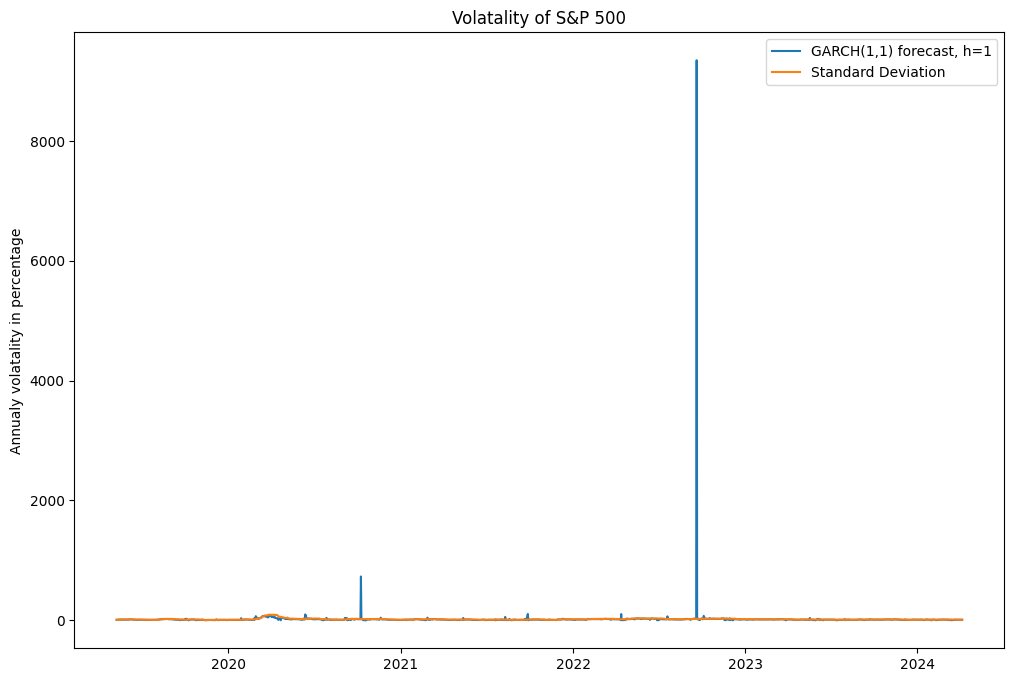

In [16]:
plt.figure(figsize=(12, 8))
x_sample = x[21:]
df2 = pd.DataFrame()
df2['returns(%)'] = x_sample
df2['vol_garch'] = vol
df2['vol_std'] = vol_std
plt.plot(df2['vol_garch'], label = 'C GARCH forecast, h=1')
plt.plot(df2['vol_std'], label = 'Standard Deviation')
plt.ylabel('Annualy volatality in percentage')
plt.title('Volatality of S&P 500')
plt.legend()
plt.show()